In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\ROOPSHREE\Downloads\Grades.csv")

In [3]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [4]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [5]:
df.shape

(571, 43)

In [6]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [8]:
grade_mapping = {
    'A': 8,
    'A+': 9,
    'A-': 5,
    'B+': 7,
    'B': 6,
    'B-': 4.9,
    'C+': 4.7,
    'C': 4,
    'C-': 3.9,
    'D+': 3.8,
    'D': 3.5,
    'D-': 3
}

In [9]:
df['PH-121'] = df['PH-121'].replace(grade_mapping)

In [10]:
df['PH-121']

0      4.9
1        8
2        8
3      3.5
4        5
      ... 
566      6
567      9
568      6
569      8
570      4
Name: PH-121, Length: 571, dtype: object

In [11]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,4.9,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,8,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,8,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,3.5,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,5,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,6,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,9,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,6,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,8,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [12]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [13]:
df['HS-101']=df['HS-101'].replace(grade_mapping)

    

In [14]:
df['HS-101']

0      3.8
1      3.5
2        6
3      4.7
4        5
      ... 
566      8
567      8
568      8
569      7
570    3.5
Name: HS-101, Length: 571, dtype: object

In [15]:
df['CY-105']=df['CY-105'].replace(grade_mapping)

In [16]:
df['CY-105']

0      3.9
1      3.8
2        8
3      3.8
4        5
      ... 
566      8
567      8
568      5
569    3.5
570    3.5
Name: CY-105, Length: 571, dtype: object

In [17]:
df['HS-105/12'] = df['HS-105/12'].replace(grade_mapping)





In [18]:
df['HS-105/12']

0        4
1      3.5
2      4.9
3      3.5
4        7
      ... 
566      5
567      8
568      7
569      8
570      4
Name: HS-105/12, Length: 571, dtype: object

In [19]:
df['MT-111'] = df['MT-111'].replace(grade_mapping)

In [20]:
df['MT-111']

0      3.9
1      4.9
2        7
3      3.5
4        8
      ... 
566      9
567      8
568      8
569    3.5
570      4
Name: MT-111, Length: 571, dtype: object

In [21]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [22]:
df['CS-105'] = df['CS-105'].replace(grade_mapping)

In [23]:
df['CS-106'] = df['CS-106'].replace(grade_mapping)

In [24]:
df['EL-102'] = df['EL-102'].replace(grade_mapping)

In [25]:
df['EE-119'] = df['EE-119'].replace(grade_mapping)

In [26]:
df['ME-107'] = df['ME-107'].replace(grade_mapping)

In [27]:
df['CS-107'] = df['CS-107'].replace(grade_mapping)

In [28]:
df['HS-205/20'] = df['HS-205/20'].replace(grade_mapping)

In [29]:
df['MT-222'] = df['MT-222'].replace(grade_mapping)

In [30]:
df['EE-222'] = df['EE-222'].replace(grade_mapping)

In [31]:
df['MT-224'] = df['MT-224'].replace(grade_mapping)

In [32]:
df['CS-210'] = df['CS-210'].replace(grade_mapping)

In [33]:
df['CS-211'] = df['CS-211'].replace(grade_mapping)

In [34]:
df['CS-203'] = df['CS-203'].replace(grade_mapping)

In [35]:
df['CS-214'] = df['CS-214'].replace(grade_mapping)

In [36]:
df['EE-217'] = df['EE-217'].replace(grade_mapping)

In [37]:
df['CS-212'] = df['CS-212'].replace(grade_mapping)

In [38]:
df['CS-215'] = df['CS-215'].replace(grade_mapping)

In [39]:
df['MT-331'] = df['MT-331'].replace(grade_mapping)

In [40]:
df['EF-303'] = df['EF-303'].replace(grade_mapping)

In [41]:
df['HS-304'] = df['HS-304'].replace(grade_mapping)

In [42]:
df['CS-301'] = df['CS-301'].replace(grade_mapping)

In [43]:
df['CS-302'] = df['CS-302'].replace(grade_mapping)

In [44]:
df['TC-383'] = df['TC-383'].replace(grade_mapping)

In [45]:
df['MT-442'] = df['MT-442'].replace(grade_mapping)

In [46]:
df['EL-332'] = df['EL-332'].replace(grade_mapping)

In [47]:
df['CS-318'] = df['CS-318'].replace(grade_mapping)

In [48]:
df['CS-306'] = df['CS-306'].replace(grade_mapping)

In [49]:
df['CS-312'] = df['CS-312'].replace(grade_mapping)

In [50]:
df['CS-317'] = df['CS-317'].replace(grade_mapping)

In [51]:
df['CS-403'] = df['CS-403'].replace(grade_mapping)

In [52]:
df['CS-421'] = df['CS-421'].replace(grade_mapping)

In [74]:
df['CS-406'] = df['CS-406'].replace(grade_mapping)

In [75]:
df['CS-414'] = df['CS-414'].replace(grade_mapping)

In [76]:
df['CS-419'] = df['CS-419'].replace(grade_mapping)

In [77]:
df['CS-423'] = df['CS-423'].replace(grade_mapping)

In [78]:
df['CS-412'] = df['CS-412'].replace(grade_mapping)

In [58]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,4.9,3.8,3.9,4,3.9,3.8,3.5,3.9,4.9,...,3.9,3.9,3.9,3.9,5,8,3.9,6,5,2.205
1,CS-97002,8,3.5,3.8,3.5,4.9,4.0,3.5,8,3.8,...,3.8,3.5,4.0,3.5,5,4.9,4,4,6,2.008
2,CS-97003,8,6,8,4.9,7,8.0,4.9,7,5,...,6,6,8.0,4,8,8,8,5,8,3.608
3,CS-97004,3.5,4.7,3.8,3.5,3.5,5.0,3.8,3.9,3.5,...,3.8,4,3.8,3.9,4.9,6,4.7,4.7,4.7,1.906
4,CS-97005,5,5,5,7,8,8.0,5,7,8,...,4.9,7,7.0,4.9,5,8,5,5,8,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,6,8,8,5,9,8.0,5,5,9,...,5,5,8.0,8,8,7,7,6,8,3.798
567,CS-97568,9,8,8,8,8,8.0,8,5,8,...,7,7,8.0,8,5,6,5,4,5,3.772
568,CS-97569,6,8,5,7,8,8.0,8,8,8,...,5,6,8.0,7,8,4,7,5,5,3.470
569,CS-97570,8,7,3.5,8,3.5,3.8,4.9,3.9,4.9,...,3.5,6,6.0,3.9,3.5,4,6,4.9,4,2.193


In [59]:
df = df.drop('Seat No.',axis=1)

In [60]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,4.9,3.8,3.9,4,3.9,3.8,3.5,3.9,4.9,3.9,...,3.9,3.9,3.9,3.9,5,8,3.9,6,5,2.205
1,8,3.5,3.8,3.5,4.9,4.0,3.5,8,3.8,3.5,...,3.8,3.5,4.0,3.5,5,4.9,4,4,6,2.008
2,8,6,8,4.9,7,8.0,4.9,7,5,5,...,6,6,8.0,4,8,8,8,5,8,3.608
3,3.5,4.7,3.8,3.5,3.5,5.0,3.8,3.9,3.5,4.7,...,3.8,4,3.8,3.9,4.9,6,4.7,4.7,4.7,1.906
4,5,5,5,7,8,8.0,5,7,8,5,...,4.9,7,7.0,4.9,5,8,5,5,8,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,6,8,8,5,9,8.0,5,5,9,7,...,5,5,8.0,8,8,7,7,6,8,3.798
567,9,8,8,8,8,8.0,8,5,8,8,...,7,7,8.0,8,5,6,5,4,5,3.772
568,6,8,5,7,8,8.0,8,8,8,6,...,5,6,8.0,7,8,4,7,5,5,3.470
569,8,7,3.5,8,3.5,3.8,4.9,3.9,4.9,3.9,...,3.5,6,6.0,3.9,3.5,4,6,4.9,4,2.193


In [61]:
df.describe()

,CS-105,CS-302,CS-403,CGPA
count,571.000000,561.000000,559.000000,571.000000
mean,6.231349,5.802139,5.908587,2.954888
std,1.660643,1.400993,1.589424,0.620552
min,3.500000,3.500000,3.500000,0.800000
25%,5.000000,4.900000,4.900000,2.538000
50%,6.000000,5.000000,5.000000,3.029000
75%,8.000000,7.000000,8.000000,3.451000
max,9.000000,9.000000,9.000000,3.985000


# DATA VISUALIZATION

C:\Users\ROOPSHREE\AppData\Local\Temp\ipykernel_8228\1194472103.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

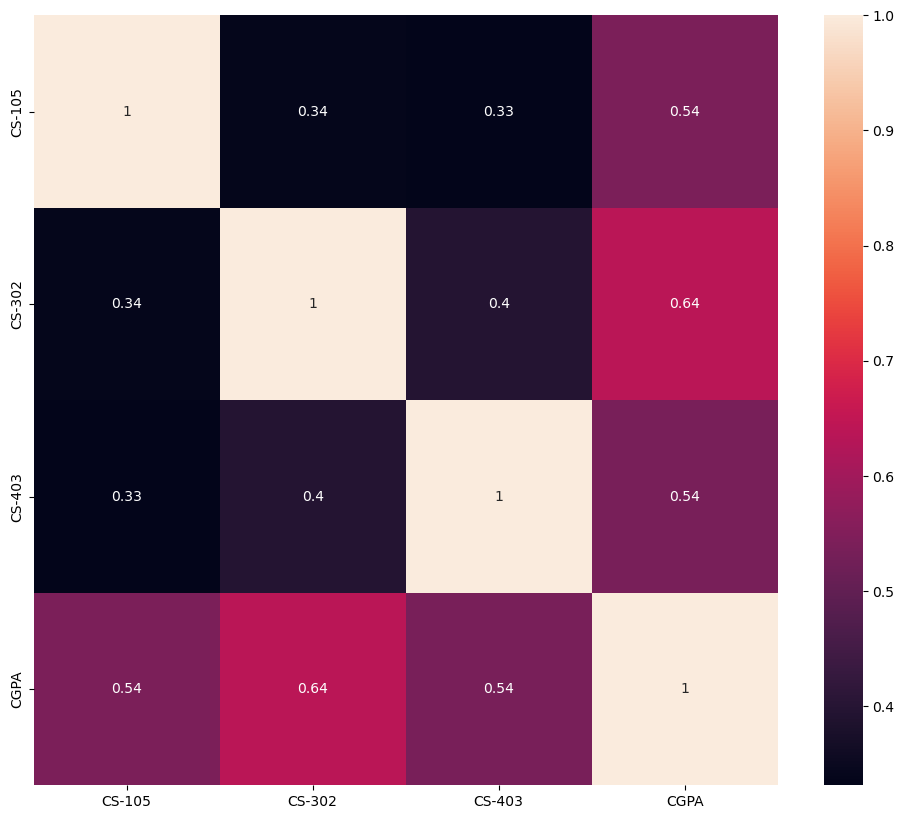

In [62]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot = True)

# Splitting Data Into Training And Testing Dataset

In [63]:
x = df.drop("CGPA",axis = 1)
x.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,4.9,3.8,3.9,4,3.9,3.8,3.5,3.9,4.9,3.9,...,4,3.9,3.9,3.9,3.9,5,8,3.9,6,5
1,8,3.5,3.8,3.5,4.9,4.0,3.5,8,3.8,3.5,...,3.5,3.8,3.5,4.0,3.5,5,4.9,4,4,6
2,8,6,8,4.9,7,8.0,4.9,7,5,5,...,5,6,6,8.0,4,8,8,8,5,8
3,3.5,4.7,3.8,3.5,3.5,5.0,3.8,3.9,3.5,4.7,...,3.9,3.8,4,3.8,3.9,4.9,6,4.7,4.7,4.7
4,5,5,5,7,8,8.0,5,7,8,5,...,5,4.9,7,7.0,4.9,5,8,5,5,8


In [64]:
y = df['CGPA']
y.head()

0    2.205
1    2.008
2    3.608
3    1.906
4    3.448
Name: CGPA, dtype: float64

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [71]:
len(x_train),len(x_test)

(456, 115)

In [72]:
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,4.9,3.8,3.9,4,3.9,3.8,3.5,3.9,4.9,3.9,...,4,3.9,3.9,3.9,3.9,5,8,3.9,6,5
1,8,3.5,3.8,3.5,4.9,4.0,3.5,8,3.8,3.5,...,3.5,3.8,3.5,4.0,3.5,5,4.9,4,4,6
2,8,6,8,4.9,7,8.0,4.9,7,5,5,...,5,6,6,8.0,4,8,8,8,5,8
3,3.5,4.7,3.8,3.5,3.5,5.0,3.8,3.9,3.5,4.7,...,3.9,3.8,4,3.8,3.9,4.9,6,4.7,4.7,4.7
4,5,5,5,7,8,8.0,5,7,8,5,...,5,4.9,7,7.0,4.9,5,8,5,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,6,8,8,5,9,8.0,5,5,9,7,...,7,5,5,8.0,8,8,7,7,6,8
567,9,8,8,8,8,8.0,8,5,8,8,...,5,7,7,8.0,8,5,6,5,4,5
568,6,8,5,7,8,8.0,8,8,8,6,...,7,5,6,8.0,7,8,4,7,5,5
569,8,7,3.5,8,3.5,3.8,4.9,3.9,4.9,3.9,...,7,3.5,6,6.0,3.9,3.5,4,6,4.9,4


# Model Building

Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression
np.random.seed(42)
lr =  LinearRegression()
lr.fit(x_train,y_train)

ValueError: could not convert string to float: 'WU'